<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [169]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [170]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [171]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

## Load the dataframe


Load the data


In [172]:
#data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [173]:
#data.head()

In [174]:
#data.info()

In [175]:

#X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [176]:
#X.head(100)

In [177]:
#X.info()

In [178]:
import requests
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the data
response = requests.get(URL1)
response.raise_for_status()  # Check that the request was successful

# Read the data into a pandas DataFrame
data = pd.read_csv(io.StringIO(response.text))

In [179]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [180]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Fetch the data
response = requests.get(URL2)
response.raise_for_status()  # Check that the request was successful

# Read the data into a pandas DataFrame
X = pd.read_csv(io.StringIO(response.text))

In [181]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [182]:
X.Flights.mean()

np.float64(1.788888888888889)

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [183]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [184]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
transform = StandardScaler()

# Fit the scaler to the data and transform it
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [185]:
from sklearn.model_selection import train_test_split

# Split the standardized data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [186]:
# Optional: Check the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


we can see we only have 18 test samples.


In [187]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [188]:
parameters = {
    'C': [0.01, 0.1, 1],       # Regularization strength (inverse): smaller values specify stronger regularization
    'penalty': ['l2'],         # Penalty (regularization term) to be used. 'l2' is Ridge-like regularization
    'solver': ['lbfgs']        # Algorithm to use in the optimization problem; 'lbfgs' supports l2 penalty
}


In [189]:

# Create a base Logistic Regression model (no parameters set yet)
lr = LogisticRegression()

# Create a GridSearchCV object:
# - Takes the logistic regression model
# - Uses the parameter grid defined above
# - Applies 10-fold cross-validation (cv=10)
logreg_cv = GridSearchCV(lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the training data
# This trains the model using each combination of parameters, evaluates them via cross-validation,
# and selects the combination with the best performance
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [190]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


In [191]:
from sklearn.metrics import confusion_matrix, classification_report

def eval_metric(model, X_train, Y_train, X_test, Y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(Y_train, y_train_pred))
    print(classification_report(Y_train, y_train_pred))


Calculate the accuracy on the test data using the method <code>score</code>:


In [192]:
eval_metric(logreg_cv, X_train, Y_train, X_test, Y_test)

Test_Set
[[ 3  3]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Train_Set
[[15  9]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        24
           1       0.84      1.00      0.91        48

    accuracy                           0.88        72
   macro avg       0.92      0.81      0.84        72
weighted avg       0.89      0.88      0.87        72



In [193]:
accuracy = logreg_cv.score(X_test, Y_test) # Changed 'model' to 'logreg_cv'
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.83


Lets look at the confusion matrix:


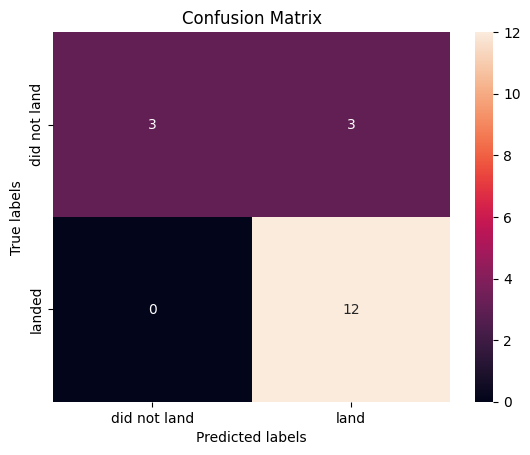

In [194]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

1    12
0     6
Name: count, dtype: int64


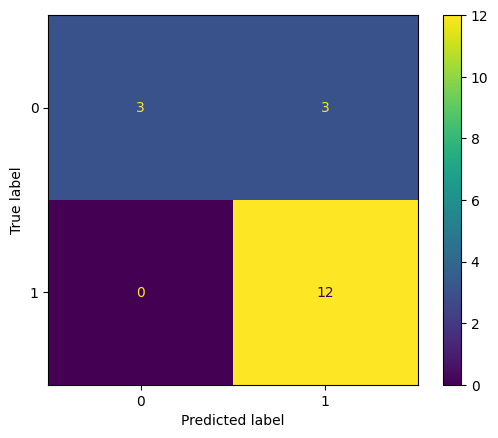

In [195]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg_cv, X_test, Y_test)
import pandas as pd # Import pandas if not already imported
print(pd.Series(Y_test).value_counts()) # Convert Y_test to Series before calling value_counts()

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [196]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [197]:
svm_cv = GridSearchCV(svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [198]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [199]:
eval_metric(svm_cv, X_train, Y_train, X_test, Y_test)

Test_Set
[[ 3  3]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Train_Set
[[16  8]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        24
           1       0.86      1.00      0.92        48

    accuracy                           0.89        72
   macro avg       0.93      0.83      0.86        72
weighted avg       0.90      0.89      0.88        72



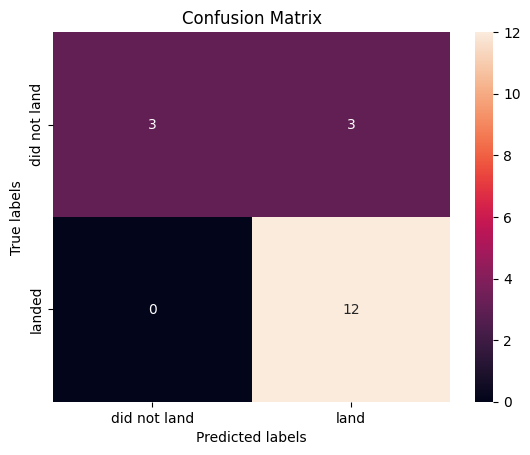

In [200]:
yhat_svm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm)

## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [201]:
accuracy = svm_cv.score(X_test, Y_test) # Changed 'model' to 'logreg_cv'
print(f"Svm_cv Test Accuracy: {accuracy:.2f}")

Svm_cv Test Accuracy: 0.83


We can plot the confusion matrix


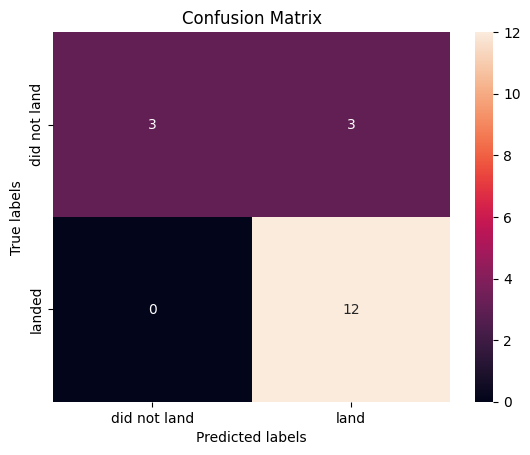

In [202]:
yhat_svm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [203]:
import numpy as np
import random
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Set global seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Split the data with fixed random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}






In [204]:
# Initialize Decision Tree with fixed random state
dt = DecisionTreeClassifier(random_state=42)

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Run GridSearchCV
tree_cv = GridSearchCV(dt, parameters, cv=cv, scoring='accuracy', n_jobs=-1)
tree_cv.fit(X_train, Y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [205]:
# Initialize Decision Tree with fixed random state
dt = DecisionTreeClassifier(random_state=42)

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Run GridSearchCV
tree_cv = GridSearchCV(dt, parameters, cv=cv, scoring='accuracy', n_jobs=-1)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [206]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8767857142857143


In [207]:
eval_metric(tree_cv, X_train, Y_train, X_test, Y_test)

Test_Set
[[ 5  1]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18


Train_Set
[[20  4]
 [ 2 46]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.92      0.96      0.94        48

    accuracy                           0.92        72
   macro avg       0.91      0.90      0.90        72
weighted avg       0.92      0.92      0.92        72



## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [208]:
accuracy = tree_cv.score(X_test, Y_test) # Changed 'model' to 'logreg_cv'
print(f"Tree_cv Test Accuracy: {accuracy:.4f}")

Tree_cv Test Accuracy: 0.9444


We can plot the confusion matrix


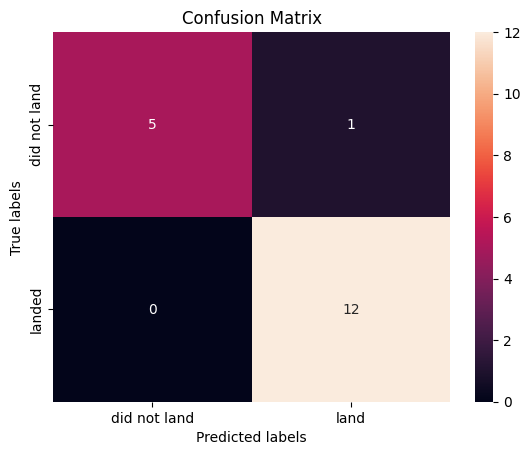

In [209]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [211]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [212]:
# Set up GridSearchCV
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit to training data
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [213]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [214]:
eval_metric(knn_cv, X_train, Y_train, X_test, Y_test)

Test_Set
[[ 3  3]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Train_Set
[[15  9]
 [ 1 47]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.84      0.98      0.90        48

    accuracy                           0.86        72
   macro avg       0.89      0.80      0.83        72
weighted avg       0.87      0.86      0.85        72



## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [215]:
accuracy = knn_cv.score(X_test, Y_test)
print(f'knn_cv score= {accuracy:.3f}') # Using f-string formatting for rounding

knn_cv score= 0.833


We can plot the confusion matrix


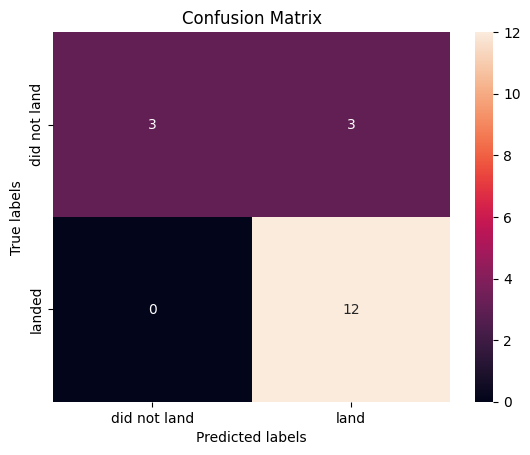

In [216]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

1    12
0     6
Name: count, dtype: int64


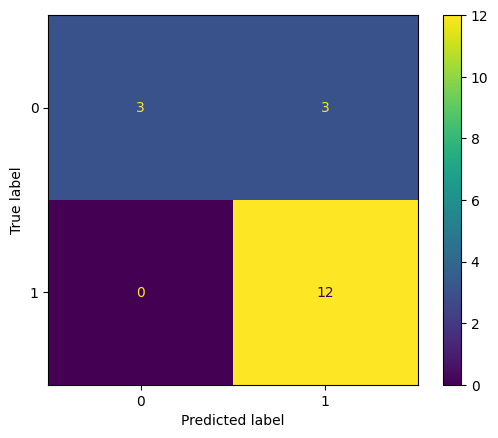

In [217]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_cv, X_test, Y_test)
import pandas as pd # Import pandas if not already imported
print(pd.Series(Y_test).value_counts()) # Convert Y_test to Series before calling value_counts()

## TASK  12


Find the method performs best:


In [218]:
all_models = [logreg_cv, svm_cv, tree_cv, knn_cv]


all_scores = [model.score(X_test, Y_test) for model in all_models]
np.round(all_scores, 3)


array([0.833, 0.833, 0.944, 0.833])

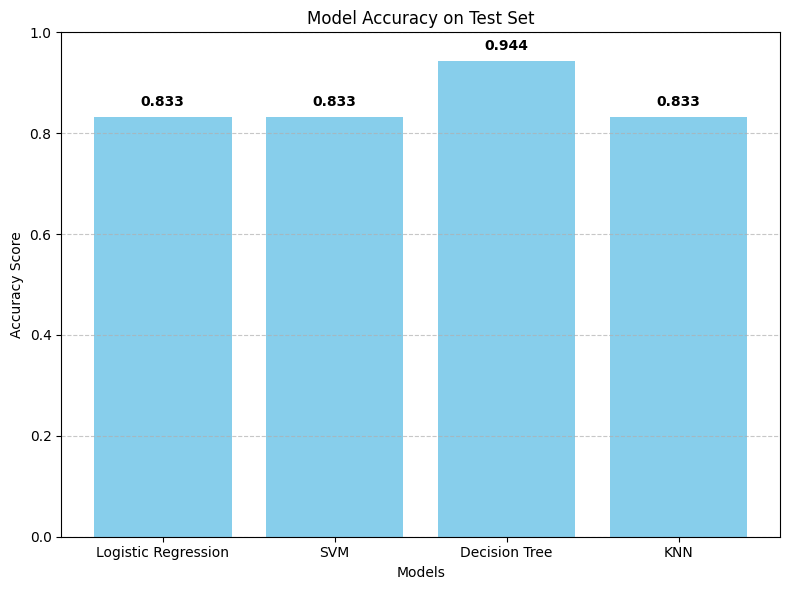

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are already defined and trained
all_models = [logreg_cv, svm_cv, tree_cv, knn_cv]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']

# Get accuracy scores
all_scores = [model.score(X_test, Y_test) for model in all_models]
rounded_scores = np.round(all_scores, 3)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, rounded_scores, color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy on Test Set')
plt.ylabel('Accuracy Score')
plt.xlabel('Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add score labels on bars
for i, score in enumerate(rounded_scores):
    plt.text(i, score + 0.02, str(score), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [220]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def eval_metric(model, X_train, Y_train, X_test, Y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')
    accuracy = accuracy_score(Y_test, y_pred)

    return precision, recall, f1, accuracy


In [221]:
model_names = ["Logistic Regression", "SVM", "Decision Tree", "KNN"]
all_models = [logreg_cv, svm_cv, tree_cv, knn_cv]

metrics = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Accuracy': []
}

for name, model in zip(model_names, all_models):
    precision, recall, f1, accuracy = eval_metric(model, X_train, Y_train, X_test, Y_test)
    metrics['Model'].append(name)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    metrics['Accuracy'].append(accuracy)


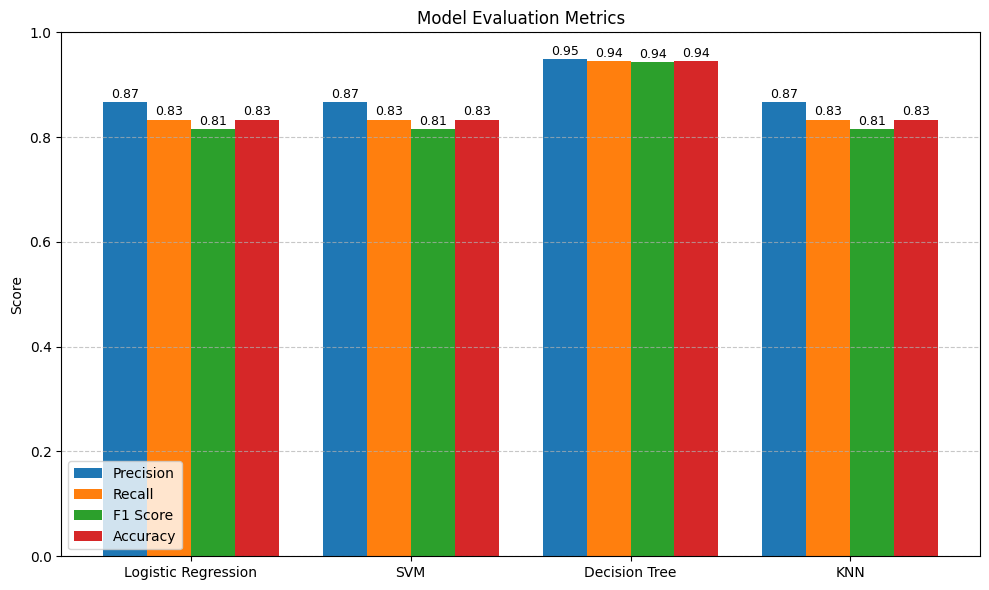

In [222]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to NumPy array
labels = metrics['Model']
precision = metrics['Precision']
recall = metrics['Recall']
f1 = metrics['F1 Score']
accuracy = metrics['Accuracy']

x = np.arange(len(labels))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - 1.5*width, precision, width, label='Precision')
bars2 = ax.bar(x - 0.5*width, recall, width, label='Recall')
bars3 = ax.bar(x + 0.5*width, f1, width, label='F1 Score')
bars4 = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy')

# Formatting
ax.set_ylabel('Score')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [223]:
from sklearn.metrics import confusion_matrix, classification_report

def eval_metric(model, X_train, Y_train, X_test, Y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    print(f"Test Accuracy: {model.score(X_test, Y_test):.3f}")
    print()

    print("Train_Set")
    print(confusion_matrix(Y_train, y_train_pred))
    print(classification_report(Y_train, y_train_pred))
    print(f"Train Accuracy: {model.score(X_train, Y_train):.3f}")


In [224]:
model_names = ["Logistic Regression", "SVM", "Decision Tree", "KNN"]
all_models = [logreg_cv, svm_cv, tree_cv, knn_cv]

for name, model in zip(model_names, all_models):
    print("="*50)
    print(f"Model: {name}")
    eval_metric(model, X_train, Y_train, X_test, Y_test)


Model: Logistic Regression
Test_Set
[[ 3  3]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

Test Accuracy: 0.833

Train_Set
[[15  9]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        24
           1       0.84      1.00      0.91        48

    accuracy                           0.88        72
   macro avg       0.92      0.81      0.84        72
weighted avg       0.89      0.88      0.87        72

Train Accuracy: 0.875
Model: SVM
Test_Set
[[ 3  3]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy   

#extras

In [225]:
#Step 1: Cross-Validation with Default Parameters
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, X_train, Y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Average CV Accuracy:", scores.mean())


Cross-Validation Scores: [0.73333333 0.8        0.92857143 0.78571429 0.85714286]
Average CV Accuracy: 0.8209523809523809


In [226]:
#Step 2: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

logreg_best = grid.best_estimator_


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.8609523809523809


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [227]:
#Option 2: Start with GridSearchCV (which uses CV internally)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best CV Accuracy: 0.8609523809523809


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [228]:
from sklearn.metrics import classification_report

y_pred = grid.predict(X_test)
print("Test Accuracy:", grid.score(X_test, Y_test))
print(classification_report(Y_test, y_pred))


Test Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
'''
# Scaling + Logistic Regression Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000))
])

param_grid = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__solver': ['saga']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
'''

'\n# Scaling + Logistic Regression Pipeline\npipe = Pipeline([\n    (\'scaler\', StandardScaler()),\n    (\'logreg\', LogisticRegression(max_iter=5000))\n])\n\nparam_grid = {\n    \'logreg__penalty\': [\'l1\', \'l2\'],\n    \'logreg__C\': [0.01, 0.1, 1, 10],\n    \'logreg__solver\': [\'saga\']\n}\n\ngrid = GridSearchCV(pipe, param_grid, cv=5, scoring=\'accuracy\')\ngrid.fit(X_train, Y_train)\n\nprint("Best Parameters:", grid.best_params_)\nprint("Best CV Accuracy:", grid.best_score_)\n'

In [230]:
logreg = LogisticRegression(solver='saga', penalty='l1', C=0.1, max_iter=5000)
logreg.fit(X_train, Y_train)


LogisticRegression(C=0.1, max_iter=5000, penalty='l1', solver='saga')

In [231]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='accuracy')

In [232]:

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best CV Accuracy: 0.8609523809523809


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
